# Case study question 03 

# A textile company regularly spent money on five advertising companies for their ads.
### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
### 2. Build a regression model to predict the profit from the given data and comment your findings on it.
### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement


# Answer 

## Loading the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy


## Loading the dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\sreer\Add_sales_data_2018.csv')

## Pre processing step

In [3]:
dataset.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
dataset.shape

(205, 7)

In [6]:
dataset.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
dataset.columns.unique()


Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
dataset.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


## Plotting the histogram

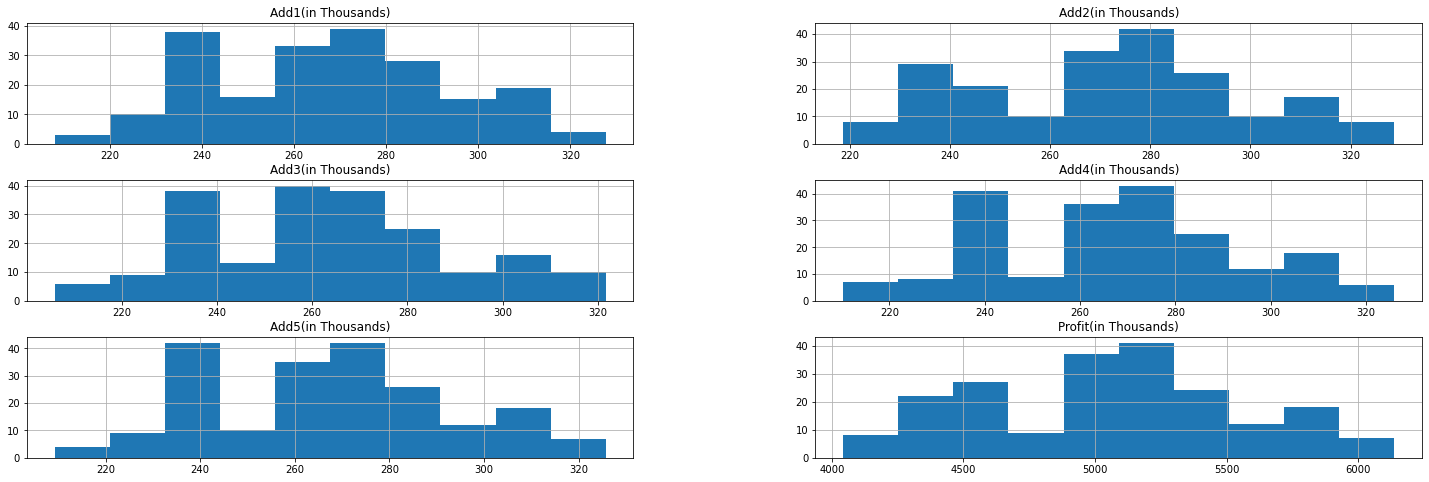

In [9]:
freqgraph=dataset.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(25,8))
plt.show()

#### Data is uniformly distributed

## Finding the correlation

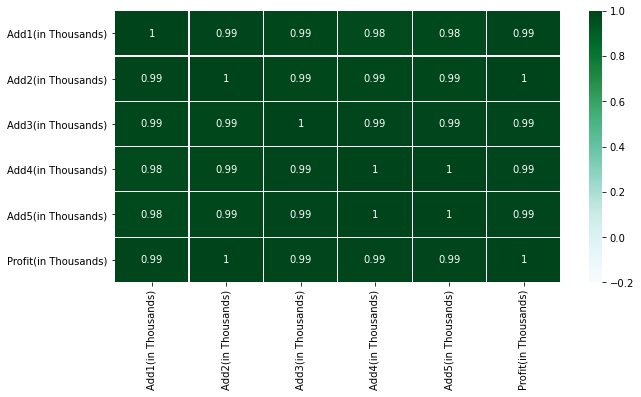

In [10]:
corrmatrix=dataset.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=1,annot=True,linewidth=0.2,cmap='BuGn')
plt.show()


### 1.First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

#### Answer:- Yes there is a relationship exist between the amount spent for advertising and the profit generated.While looking on the heatmap we can see that the amount spent by different companies for advertisement has high positive correlation with the profit generated.This means that when the amount spent increases profit also increases.

## Feature reduction

In [11]:
dataset.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [12]:
data1=dataset.drop(['Date'],axis=1)

In [13]:
y=data1['Profit(in Thousands)']
X=data1.drop(['Profit(in Thousands)','Add4(in Thousands)'],axis=1)
X

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,215.15
1,217.00,218.60,205.90,209.20
2,223.50,227.80,216.15,218.20
3,230.00,237.50,225.75,227.60
4,234.55,234.60,221.05,230.90
...,...,...,...,...
200,288.00,288.25,279.20,284.30
201,290.00,292.50,282.20,284.45
202,298.60,298.60,286.65,287.80
203,290.00,299.55,285.90,298.35


In [14]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,random_state=42,test_size=0.25)


## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

## Importing the model

In [15]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
predictions=model.predict(X_test)
print("y_test:",y_test)
print("Predictions:",predictions)

y_test: 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
Predictions: [4153.2818461  4445.71740853 5130.40796973 4906.50501468 5006.82541736
 4623.35932117 5384.57472057 5328

## Finding the mean square error

In [16]:
print("MSE is:",mean_squared_error(y_test,predictions))

MSE is: 0.7591134869858008


In [17]:
#calculating r-squared value
from sklearn.metrics import r2_score
print("R-squared is:%.3f"%r2_score(y_test,predictions))

R-squared is:1.000


In [18]:
#another method for calculating R-squared
corr_matrix = np.corrcoef(y_test, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R_sq:%.2f"%R_sq)

R_sq:1.00


(4074.225167232034, 6178.284349282366, 4075.5201265835735, 6179.579308633905)

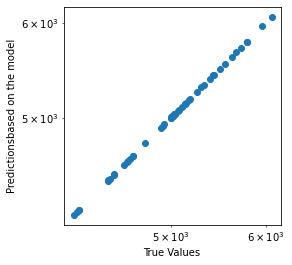

In [19]:
# plotting the graph of True value vs predictions
g=plt.scatter(y_test, predictions)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictionsbased on the model')
g.axes.axis('equal')
g.axes.axis('square')

#### The model created gives the profit generated and the amount spend by the company for advertisement This  model is 76% efficient and it best fits for the data since 100% of variation in the output variable(dependent variable) is explained by input variables(independent variables)

## 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement 

In [20]:
X.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,215.15
1,217.00,218.60,205.90,209.20
2,223.50,227.80,216.15,218.20
3,230.00,237.50,225.75,227.60
4,234.55,234.60,221.05,230.90


In [21]:
predict_sample=[[290,312,309,320]]
profit_generated=model.predict(predict_sample).item()
print("Profit generated by the company is: %0.2f"%profit_generated)

Profit generated by the company is: 5842.43
